In [1]:
%load_ext tikzmagic
%matplotlib inline

# 베르누이분포와 이항분포

## 베르누이분포

<b>베르누이분포(bernoulli distribution)</b>는 값이 두가지로만 나오는 범주값 확률변수의 확률분포다. 예를 들어 앞 절에서 설명한 팁 데이터에서 성별을 나타내는 sex 필드나 흡연유무를 나타내는 smoker 필드, 그리고 점심/저녁을 나타내는 time 필드는 모두 베르누이분포를 따른다고 할 수 있다. 베르누이분포의 값은 성별일 경우 "Male/Female", 흡연유무를 나타내는 경우 "Yes/No"같이 문자열이 되는 경우가 많지만 수학적 모형을 위해 이 값을 0과 1이라는 숫자로 바꾸어서 사용하는 경우가 보통이다. 어느 값을 0으로 하고 어느 값을 1로 할지는 분석하는 사람의 마음대로다.

### 베르누이분포의 확률분포함수

확률변수 $x$가 베르누이분포를 따르는 경우 다음과 같이 표시한다.

$$ x \sim \text{Bern}(x) $$

위 식에서 $\text{Bern}(x)$은 베르누이분포의 확률질량함수를 가리키는 기호다. 

베르누이분포의 확률질량함수 $\text{Bern}(x)$의 수식은 다음과 같다.

$$
\begin{split}
\begin{align}
\text{Bern}(x;\mu) = 
\begin{cases} 
\mu   & \text{if }x=1, \\
1-\mu & \text{if }x=0
\end{cases}
\end{align}
\end{split}
$$

이 식에서 $x$의 값이 1이 될 확률을 $\mu$라는 기호로 표시한다. $x$의 값이 0이 될 확률은 $1-\mu$가 된다. 위 식에서 베르누이분포의 모수는 $\mu$ 하나만 있다는 것을 알 수 있다. 모수는 위 식에서 표시하였듯이 확류변수의 값 기호 $x$ 오른쪽에 세미콜론(;) 기호를 붙이고 그 옆에 표시한다. 만약 1과 0이 나올 확률이 같다면 다음과 같이 쓸 수 있다. 

$$
\begin{split}
\begin{align}
\text{Bern}(x;\mu) = 
\begin{cases} 
0.5   & \text{if }x=1, \\
0.5 & \text{if }x=0
\end{cases}
\end{align}
\end{split}
$$

확률질량함수 $\text{Bern}(x)$을 다음과 같이 쓰기도 한다. $x$의 값에 0과 1을 각각 대입해보면 이 식과 위에서 쓴 식은 같은 식이라는 것을 알 수 있을 것이다.

$$ \text{Bern}(x;\mu) = \mu^x(1-\mu)^{(1-x)} $$

만약 1과 0이 나올 확률이 같다면 다음과 같이 쓸 수 있다. 

$$ \text{Bern}(x;\mu) = 0.5^x0.5^{(1-x)} $$

### 베르누이분포의 예

위에서 이야기한대로 팁 데이터에서 성별을 나타내는 sex 데이터는 남성 또는 여성의 두 가지 값만 가지므로 베르누이분포를 따르는 확률변수다. 따라서 다음과 같이 표현할 수 있다. 

$$ \text{sex} \sim \text{Bern}(x;\mu_{\text{sex}}) $$

sex 데이터의 확률분포는 다음과 같이 시각화할 수 있다.

In [2]:
import seaborn as sns
import matplotlib.pylab as plt

tips = sns.load_dataset("tips")

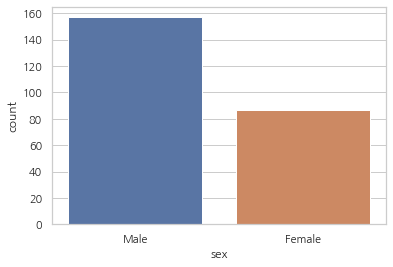

In [3]:
sns.countplot(x="sex", data=tips)
plt.show()

### 베르누이분포의 모수추정

베르누이분포는 확률분포함수가 고정된 수식으로 표현된 확률분포모형이므로 모수값 $\mu$만 알 수 있다면 확률분포함수를 완전히 알아내는 것이다. 그러면 베르누이분포의 모수는 다음 수식으로 추정한다. 이 식은 이후에 설명할 최대가능도추정(maximum likelihood estimation)방법을 따른 결과이다. 자세한 이론은 이후에 다루도록 한다.

$$ \hat{\mu} = \dfrac{N_1}{N_1 + N_0} $$

이 식에서 수학기호 $\hat{\mu}$는 모수 $\mu$의 추정치를 말한다. $N_0$는 데이터 값이 0인 횟수, $N_1$은 데이터 값이 1인 횟수다. 즉, 전체 데이터 중 1이 나온 횟수의 비율이 모수 $\mu$의 추정치 $\hat{\mu}$가 된다. 


실제로 sex 데이터의 모수를 추정해보자. 여기에서는 남자(Male)인 경우를 $x=1$인 경우라고 가정한다. 전체 레코드 개수는 다음 코드에서 보듯이 244개다.

In [5]:
len(tips)

244

다음 코드로는 $N_1=157, N_0=87$이라는 것을 알 수 있다.

In [11]:
vc = (tips["sex"] == "Male").value_counts()
N1, N0 = vc[True], vc[False]
N1, N0

(157, 87)

따라서 모수의 추정치는 약 0.6434426229508197가 된다.

In [13]:
mu_hat = N1 / (N1 + N0)
mu_hat

0.6434426229508197

### 모수추정에 관한 추가적인 사항

이렇게 모수를 추정하였지만 아직 다음과 같은 몇가지 의문점이 남아있다. 

* 이 모수 추정치는 정말 정확한 값인가? 
* 만약 이 모수 추정치가 정확한 값이 아니라면 어느 정도의 신뢰도를 가지는 것인가?
* 만약 모수에 대해 추가적인 정보가 있다면 어떻게 이를 추정치에 반영할 수 있을까?
* 이 모수 추정치를 0.64344..가 아니라 그냥 0.6이라고 해도 되는걸까?

첫번째 질문에 대한 답은 당연히 "아니다(No)"이다. 예를 들어 우리가 측정한 데이터의 개수가 달라지면 이 모수 추정치는 달라진다. 만약 데이터가 10개밖에 없다면 모수의 추정치는 다음과 같이 0.8이 된다.

In [14]:
vc = (tips["sex"][:10] == "Male").value_counts()
N1, N0 = vc[True], vc[False]
N1 / (N1 + N0)

0.8

우리가 추정에 사용한 표본에 따라 추정치가 변하는 것을 알 수 있다. 따라서 위에서 구한 추정치는 정확한 값이라고 할 수 없다. 그렇다면 이렇게 부정확한 모수 추청치의 신뢰도는 어떻게 구할 것인가? 이 부분에 대해서는 아래에서 설명할 모수 추정치의 신뢰구간(confidence interval)이라는 것을 사용하여 구할 수 있다. 

세번째 의문에 대해 생학해보자. 만약 극단적으로 데이터를 다음과 같이 1번부터 3번까지 3개만 얻는다면 모두 남성(Male)이라는 결과가 나온다.

In [17]:
tips["sex"][1:4]

1    Male
2    Male
3    Male
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

그러면 모수의 추정치는 1이 된다. 만약 정말 베르누이분포의 모수값이 1이라면 이후에 측정할 모든 표본값은 언제나 1이 나와야 한다는 뜻이다. 하지만 우리의 상식으로는 그럴 가능성이 극히 적다는 것을 안다. 이 추정치는 표본을 3개밖에 쓰지 않았기 때문에 얻어진 극단적으로 부정확한 값이며 실제 값은 1보다 작을 것이라는 것이 우리의 상식에 맞는 결과다. 즉, 우리의 상식이라는 추가적인 정보를 이 추정치에 반영할 수 있는 방법이 필요하다. 이는 이후의 절에서 설명할 베이즈 추정(Bayesian estimation) 방법을 사용하면 된다. 

세번째 의문은 모수의 검정(test)과 관련된 내용으로 이후에 나올 검정에 관한 절에서 설명할 예정이다.

## 이항분포

<b>이항분포(binomial distribution)</b>는 베르누이분포와 밀접한 관계를 가지고 있다. 이항분포의 수학적 정의는 베르누이분포를 따르는 확률변수에서 $N$개의 표본을 얻었을 때 그 중 1인 값이 나오는 횟수의 분포다. 

예를 들어 설명해 보자. 앞에서 팁 데이터 중 sex 데이터는 베르누이분포를 따른다고 하였다. 